<a href="https://colab.research.google.com/github/soumya997/Linear_Regression_basic-_Model/blob/master/Linear_Reggression_Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
from torch.autograd import variable
import numpy as np

#prepairing the dataset

x_values = [2,4,5,4,6,7,8,9,1,2,9]
x_train = np.array(x_values , dtype=np.float32)
x_train = x_train.reshape(-1,1)              
y_values = [2*x+1 for x in x_values]
y_train = np.array(y_values , dtype=np.float32)
y_train = y_train.reshape(-1,1) 

#creating the model

# Create class
class LinearRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)  

    def forward(self, x):
        out = self.linear(x)
        return out

#instantiate the loss class

input_dim = 1
output_dim = 1

model = LinearRegressionModel(input_dim, output_dim)

#instantiate the loss class

criterion = nn.MSELoss()

#instantiate the optimizer class



optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
###TRAINING THE MODEL

#seting the hyperparameter(epoch)
epoch = 500

#seting the loop
for i in range(epoch):
  i = i % 10
  #converting the numpy variables into torch variables for the training labels values or y_values 

  inputs = torch.from_numpy(x_train).requires_grad_()
  labels = torch.from_numpy(y_train)  
  
                                         
                                                   
 
 
                                                                                                                                                                                                       
  optimizer.zero_grad()                               #making the gradient zero for every iteration(as we don't want to sum up the gradients for every                                                                                                                                            iterations)
  
  outputs = model(inputs)                             #Estimating the outputs for every value of inputs and for every iterations
  
  loss = criterion(outputs , labels)                  #Estimating the loss for every itrrations
  
  loss.backward()                                     #getting gradient(dy/dx) w.r.t paremeters
  
  optimizer.step()                                    #updating our parameters using gradients(paremeters=parameters-learning_rate*parameter_gradient)
  
  print('epoch{} ,loss{}'.format(epoch,loss.item())) #printng epoch and loss
  

epoch500 ,loss152.432373046875
epoch500 ,loss13.721335411071777
epoch500 ,loss1.3378005027770996
epoch500 ,loss0.23138226568698883
epoch500 ,loss0.1316676288843155
epoch500 ,loss0.12182820588350296
epoch500 ,loss0.12001989036798477
epoch500 ,loss0.11893633753061295
epoch500 ,loss0.11792539805173874
epoch500 ,loss0.11692847311496735
epoch500 ,loss0.11594047397375107
epoch500 ,loss0.11496063321828842
epoch500 ,loss0.11398966610431671
epoch500 ,loss0.11302638053894043
epoch500 ,loss0.11207126080989838
epoch500 ,loss0.1111244186758995
epoch500 ,loss0.11018556356430054
epoch500 ,loss0.10925472527742386
epoch500 ,loss0.10833168029785156
epoch500 ,loss0.10741614550352097
epoch500 ,loss0.10650885850191116
epoch500 ,loss0.10560872405767441
epoch500 ,loss0.10471662878990173
epoch500 ,loss0.10383167117834091
epoch500 ,loss0.1029544249176979
epoch500 ,loss0.10208471119403839
epoch500 ,loss0.1012219563126564
epoch500 ,loss0.10036679357290268
epoch500 ,loss0.0995190218091011
epoch500 ,loss0.09867797

In [2]:
# Purely inference
predicted = model(torch.from_numpy(x_train).requires_grad_()).data.numpy()
predicted

array([[ 4.936328 ],
       [ 8.964173 ],
       [10.978096 ],
       [ 8.964173 ],
       [12.992019 ],
       [15.005941 ],
       [17.019865 ],
       [19.033789 ],
       [ 2.9224052],
       [ 4.936328 ],
       [19.033789 ]], dtype=float32)

In [3]:
y_train

array([[ 5.],
       [ 9.],
       [11.],
       [ 9.],
       [13.],
       [15.],
       [17.],
       [19.],
       [ 3.],
       [ 5.],
       [19.]], dtype=float32)

In [6]:
x1_values = [9,3,54,6,44,2,11,23,4,66,8,9]
x1_train = np.array(x1_values , dtype=np.float32)
x1_train = x1_train.reshape(-1,1)   


predicted = model(torch.from_numpy(x1_train).requires_grad_()).data.numpy()
predicted

array([[ 19.033789 ],
       [  6.9502506],
       [109.66031  ],
       [ 12.992019 ],
       [ 89.52108  ],
       [  4.936328 ],
       [ 23.061632 ],
       [ 47.228703 ],
       [  8.964173 ],
       [133.82738  ],
       [ 17.019865 ],
       [ 19.033789 ]], dtype=float32)

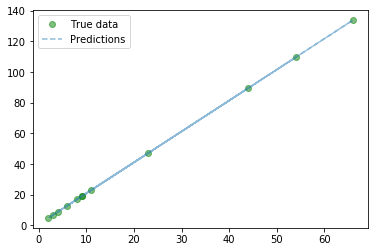

In [8]:
import matplotlib.pyplot as plt

# Clear figure
plt.clf()

# Get predictions
predicted = model(torch.from_numpy(x1_train).requires_grad_()).data.numpy()

# Plot true data
plt.plot(x1_train, predicted , 'go', label='True data', alpha=0.5)

# Plot predictions
plt.plot(x1_train, predicted, '--', label='Predictions', alpha=0.5)

# Legend and plot
plt.legend(loc='best')
plt.show()